In [1]:
import  cv2
import pytesseract

In [2]:
pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [3]:
import matplotlib.pyplot as plt

fA



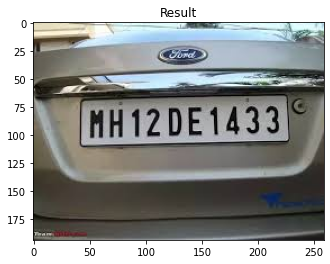

In [4]:
img = cv2.imread(r"C:\Users\rj100\OneDrive\Pictures\car4.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img))
plt.imshow(img)
plt.title('Result')
plt.show()

In [5]:
import imutils

In [6]:
import cv2
img1  = cv2.imread(r"C:\Users\rj100\OneDrive\Pictures\car4.jpg")
img1 = cv2.resize(img,(620,480))
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray = cv2.bilateralFilter(gray,13,15,15)
edged = cv2.Canny(gray,30,200)
contours = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours,key = cv2.contourArea,reverse=True)[:10]
screenCnt = None
for c in contours:
    peri = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c,0.018*peri,True)
    
    if len(approx) == 4:
        screenCnt = approx
        break

In [7]:
import numpy as np

In [8]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

In [9]:
(x,y) = np.where(mask == 255)
(topx,topy) = (np.min(x),np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1 , topy:bottomy+1]

In [10]:
text = pytesseract.image_to_string(Cropped,config = '--psm 11')
print("Detected license plate Number is:", text)
img = cv2.resize(img,(500,300))
cropped = cv2.resize(Cropped,(600,400))

Detected license plate Number is: MH12DE1433



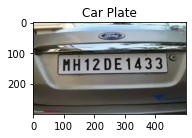

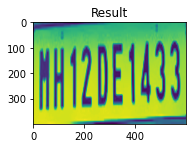

(<matplotlib.image.AxesImage at 0x2494c9af9c8>, Text(0.5, 1.0, 'Result'), None)

In [11]:
plt.subplot(1,2,1)
plt.imshow(img),plt.title('Car Plate'),plt.show()
plt.subplot(1,2,2)
plt.imshow(cropped),plt.title("Result"),plt.show()